<a href="https://colab.research.google.com/github/anmolrawat626/pregrad-major-project/blob/main/global_cancer_patients_2015_2024_Analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis On Global Cancer Patients

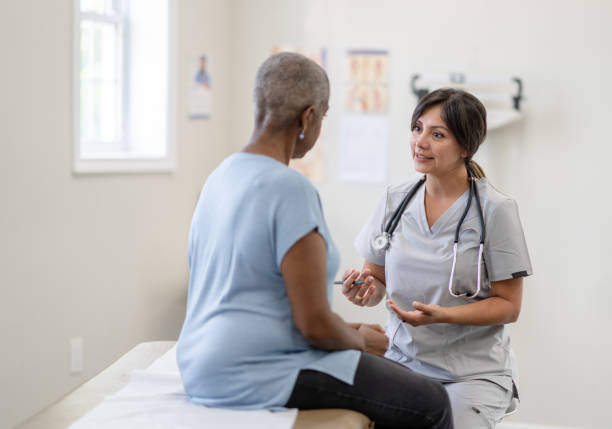

**Data overview:**

The dataset used in this project consists of synthetic records related to cancer patients. Each record captures various aspects of a patient's demographic, clinical, and treatment-related data.The key features include

***Demographics:***

Age: Numerical age of the patient.

Gender: Categorical variable with values such as Male, Female, and Other.

***Cancer Information:***

Cancer Type: Type of cancer diagnosed (e.g., Lung, Breast, Leukemia, etc.).

Cancer Stage: Clinical stage of cancer at diagnosis (Stage 0 to Stage IV).

***Clinical Outcomes:***

Survival Years: Number of years the patient has survived post-diagnosis.

Target_Severity_Score: A numerical score indicating severity of the cancer case.

Economic Impact:

Treatment Cost: Total cost incurred for cancer treatment in USD.



**What is EDA?**

Exploratory Data Analysis (EDA) is the process of examining and visualizing datasets to understand their main characteristics before applying any modeling or machine learning techniques. It helps uncover patterns, spot anomalies, check assumptions, and test hypotheses using summary statistics and graphical representations.

Key goals of EDA include:

Understanding the distribution of data

Identifying relationships between variables

Detecting outliers or missing values

Informing feature engineering and model selection



In this project i will plot some visualizations to analyze the given data and  employ Different Machine learning models including regression and classification models to do various predicting modeling tasks.

# Importing the dependencies

**Importing important python libraries**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The above mentioned libraries are essential for data analysis, manipulation, and visualization in this project:  

- **`pandas` (`pd`)** → For structured data operations (DataFrames, Series).  
- **`numpy` (`np`)** → For numerical computations and array operations.  
- **`matplotlib.pyplot` (`plt`)** → For basic plotting and visualizations.  
- **`seaborn` (`sns`)** → For advanced statistical visualizations (built on Matplotlib).  

These libraries form the foundation for data handling and exploratory analysis in Python.  


**Imported Libraries for Classification and Regression Tasks**



In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay,classification_report, r2_score
from sklearn.linear_model import LinearRegression

Data Preparation & Model Training

**Data Splitting**:

train_test_split → Partition dataset into training/test subsets

cross_val_score → Evaluate model performance using K-fold cross-validation

**Feature Engineering**:

LabelEncoder → Transform categorical labels into numerical values

**Algorithms**

Classification Models:

**GaussianNB** → Naive Bayes probabilistic classifier (assumes feature independence and is based on baye's theorem)

**RandomForestClassifier** → Ensemble method using multiple decision trees

**Regression Models**:

**LinearRegression** → Ordinary least squares linear predictor

**RandomForestRegressor** → Tree-based ensemble technique for continuous value prediction

**Model Evaluation**

**Classification Metrics:**

**accuracy_score** → Proportion of correct predictions

**confusion_matrix** → error breakdown

**ConfusionMatrixDisplay** → Visual representation of classification errors
classification_report → gives precision / recall report

**Regression Metrics**:

**r2_score** → Coefficient of determination (explained variance)

**Validation**:

**cross_val_score** → Robust performance estimation via stratified K-folds



# Data collection and processing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving global_cancer_patients_2015_2024.csv to global_cancer_patients_2015_2024.csv


In [ ]:
df = pd.read_csv("global_cancer_patients_2015_2024.csv")
df.head()

,Age,Gender,Country_Region,Genetic_Risk,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,71,Male,UK,6.4,8.7,Lung,Stage III,62913.44,5.9,4.92
1,34,Male,China,1.3,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,80,Male,Pakistan,7.4,0.1,Breast,Stage II,6984.33,7.1,5.84
3,40,Male,UK,1.7,2.7,Colon,Stage I,67446.25,1.6,3.12
4,43,Female,Brazil,5.1,0.5,Skin,Stage III,77977.12,2.9,3.62


In [ ]:
df.tail()

,Age,Gender,Country_Region,Genetic_Risk,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
49995,80,Male,Pakistan,2.3,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,40,Female,USA,6.4,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,74,Male,Pakistan,6.2,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,21,Male,Brazil,4.0,8.1,Liver,Stage IV,45100.47,7.5,6.54
49999,22,Male,Pakistan,5.1,0.7,Liver,Stage 0,64023.82,7.4,3.76


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    50000 non-null  int64  
 1   Gender                 50000 non-null  object 
 2   Country_Region         50000 non-null  object 
 3   Genetic_Risk           50000 non-null  float64
 4   Obesity_Level          50000 non-null  float64
 5   Cancer_Type            50000 non-null  object 
 6   Cancer_Stage           50000 non-null  object 
 7   Treatment_Cost_USD     50000 non-null  float64
 8   Survival_Years         50000 non-null  float64
 9   Target_Severity_Score  50000 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
df.describe()

,Age,Genetic_Risk,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,5.001698,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.885773,2.894504,27363.229379,2.883335,1.199677
min,20.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Country_Region,0
Genetic_Risk,0
Obesity_Level,0
Cancer_Type,0
Cancer_Stage,0
Treatment_Cost_USD,0
Survival_Years,0
Target_Severity_Score,0


In [ ]:
print(df.shape)

(50000, 10)


In [ ]:
print(df.dtypes)


Age                        int64
Gender                    object
Country_Region            object
Genetic_Risk             float64
Obesity_Level            float64
Cancer_Type               object
Cancer_Stage              object
Treatment_Cost_USD       float64
Survival_Years           float64
Target_Severity_Score    float64
dtype: object


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Country_Region', 'Genetic_Risk', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

# Data visualizations

**Histogram representing Age distribution of cancer patients**

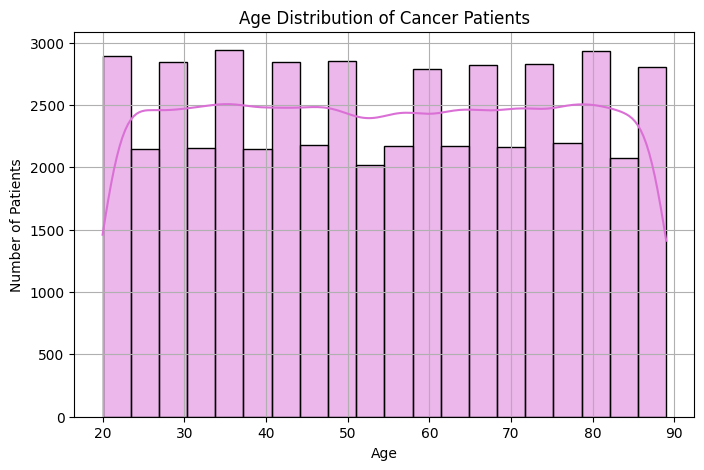

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='orchid')
plt.title('Age Distribution of Cancer Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.show()


Upon analyzing the above histogram i found that

1.The histogram shows that cancer affects people across a wide age range, from
around 20 to 90 years.

2.The distribution is fairly uniform, with no sharp peaks or dips, indicating that people from different age groups are affected by cancer.

3.The KDE (smooth line) reinforces this consistency, showing only minor fluctuations in frequency.

4.This suggests that age alone may not be a strong factor in predicting
cancer occurrence — other factors like genetics, lifestyle, or environmental exposure might play a more prominent role.

**Pie Chart showing gender distribution of cancer patients**

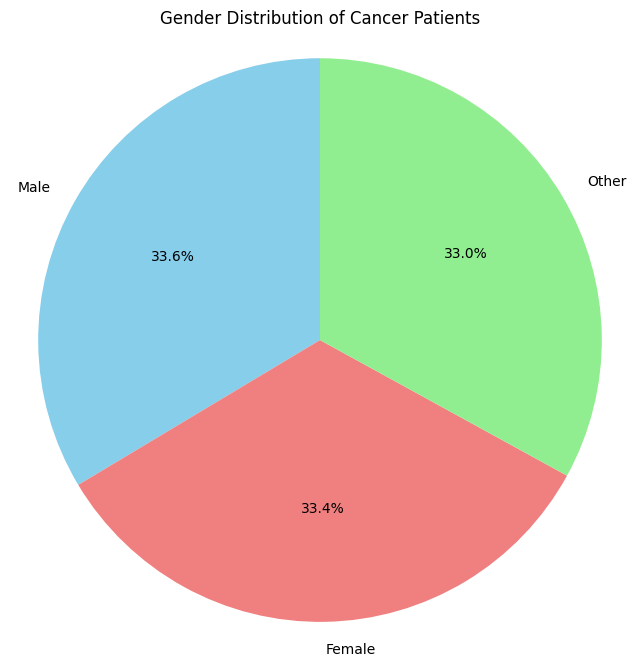

In [ ]:
gender_count = df['Gender'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', colors = ['skyblue', 'lightcoral', 'lightgreen'], startangle=90)
plt.title('Gender Distribution of Cancer Patients')
plt.axis('equal')
plt.show()


Upon analyzing the above pie chart, i learnt that

The pie chart illustrates a nearly equal distribution of cancer patients across the three gender categories: Male (33.6%), Female (33.4%), and Other (33.0%).

The proportions are very close to one-third each, indicating a balanced representation across gender identities in the dataset.

It implies that gender may not be a dominant variable alone in determining cancer occurrence or severity in this dataset.



**Barplot showing cancer patients by country**

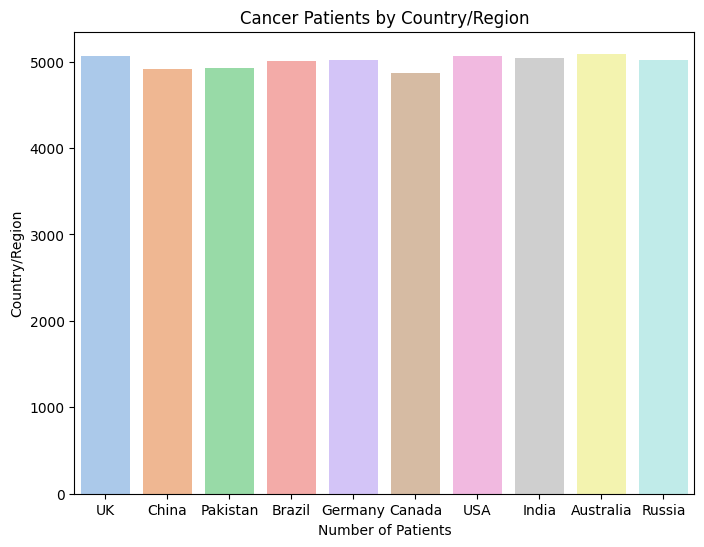

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Country_Region', hue = 'Country_Region', data=df, palette='pastel', legend = False)
plt.title('Cancer Patients by Country/Region')
plt.xlabel('Number of Patients')
plt.ylabel('Country/Region')
plt.show()

Upon reading the above barplot i learnt that

The distribution is fairly uniform among the listed countries — such as the UK, USA, India, Australia, Brazil, and others — with patient counts hovering around the 5000 mark for each.

Thus, the disparity among countries regarding cancer patients is quite low.

**Pairplot: Age, Genetic Risk & Obesity vs. Severity Score**


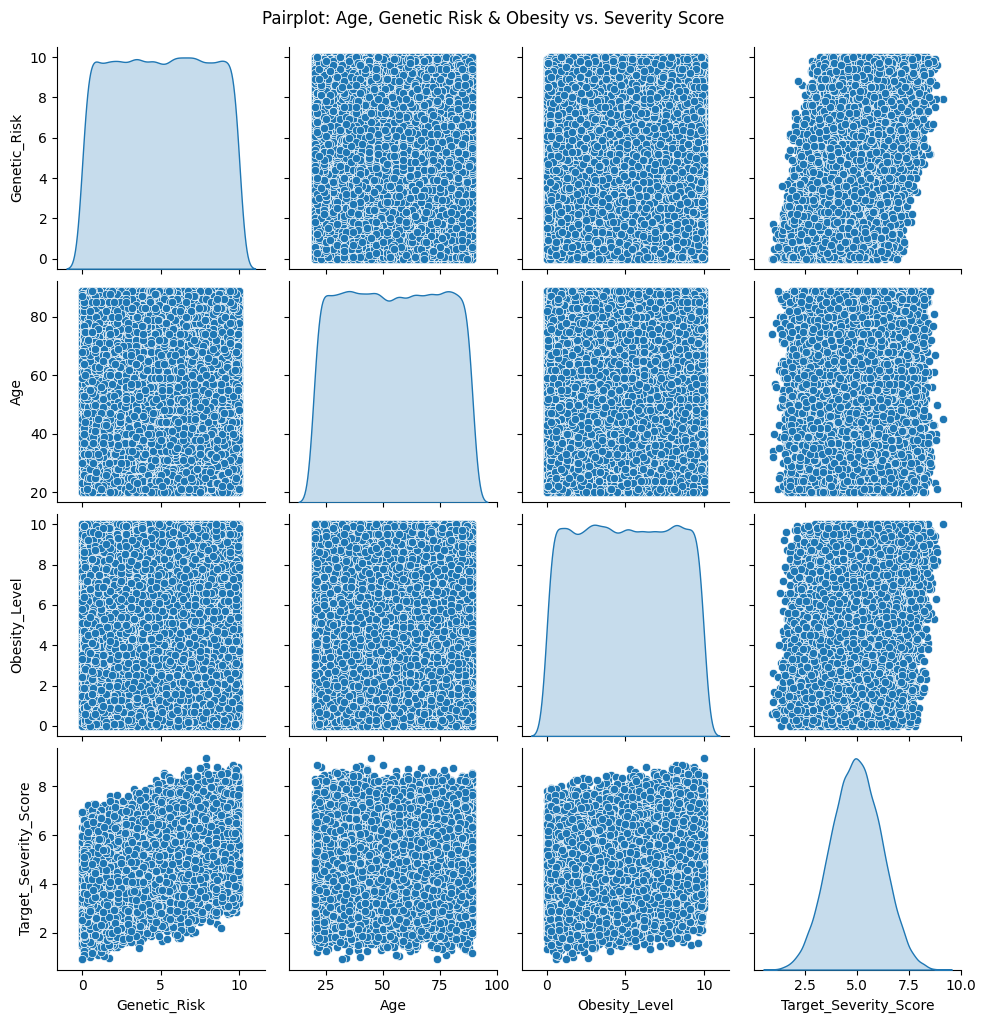

In [ ]:
sns.pairplot(data=df[['Genetic_Risk', 'Age', 'Obesity_Level', 'Target_Severity_Score']], diag_kind='kde')
plt.suptitle("Pairplot: Age, Genetic Risk & Obesity vs. Severity Score", y=1.02)
plt.show()

**Diagonal plots display individual feature distributions**:

1.Genetic_Risk and Obesity_Level are nearly uniformly distributed across their range.

2.Age is spread relatively evenly between 20 and 90.

3.Target_Severity_Score follows a normal distribution, peaking around the mid-range.


**Scatter plots reveal**:

1.A positive correlation between Genetic_Risk and Target_Severity_Score – higher genetic risk often leads to higher severity.

2.No clear trend between Age and Severity Score – indicating that age alone may not be a strong predictor.

3.Obesity_Level shows slight dispersion but not a strong correlation with severity.

**Result**:

1.Among these, Genetic Risk appears to be the most impactful feature in predicting Severity Score.

**violin plot - Age distribution across gender**

Text(0.5, 1.0, 'Age Distribution Across Gender')

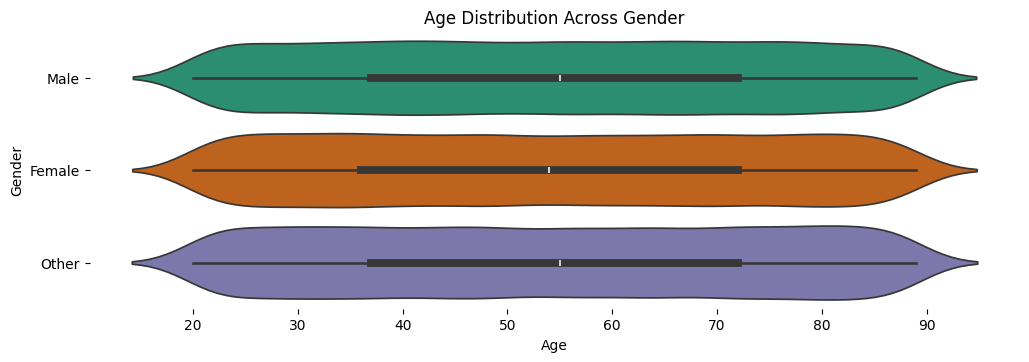

In [ ]:
figsize = (12, 1.2 * len(df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Gender', inner='box', hue = 'Gender', legend = False, palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Age Distribution Across Gender')


1.This violin plot displays the distribution of age across three gender categories: Male, Female, and Other.

2.The width of each violin represents the density of data points (more patients at that age range).

3.All genders show a broad and relatively even age spread from about 20 to 90 years.

4.The median (white dot) and interquartile range (thicker black bar) are very similar for all three genders, indicating that:

5.Age distribution is consistently balanced across gender identities.

6.No specific gender has a significantly younger or older cancer patient group.

**Heatmap representing cancer types by gender**

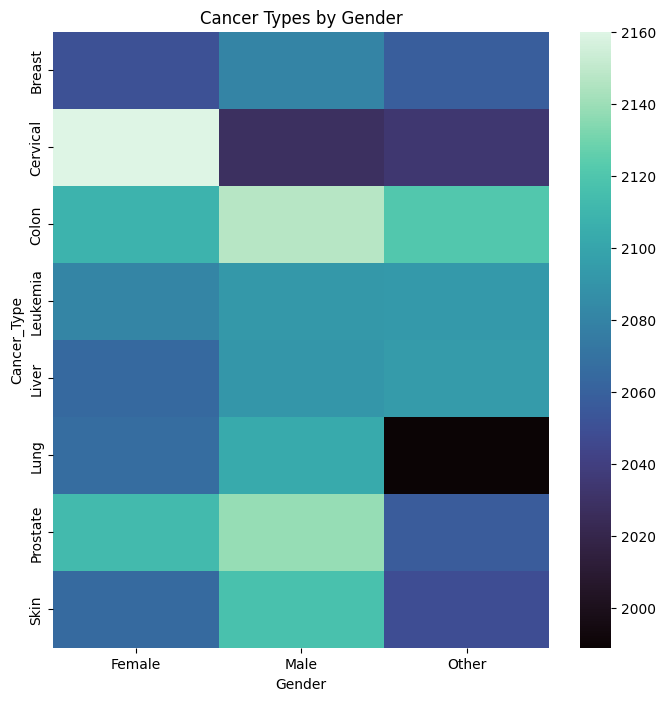

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Cancer_Type'].value_counts()
    for x_label, grp in df.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='mako')
plt.title('Cancer Types by Gender')
plt.xlabel('Gender')
_ = plt.ylabel('Cancer_Type')

This heatmap visualizes the distribution of cancer types across different gender categories (Female, Male, Other). The color intensity represents the number of patients — darker shades indicate lower counts, and lighter shades indicate higher counts.

**Cervical Cancer**:

Expectedly highest among females (lightest color).

Very low incidence in males and others, which aligns biologically.

**Prostate Cancer**:

Highest among males, which is biologically consistent.

Significantly lower counts in females and others, likely due to data or classification inconsistencies.

**Colon, Liver, and Leukemia**:

Fairly balanced across all genders, indicating no major gender bias for these cancer types in your dataset.

**Breast Cancer**:

Slightly higher in females, but not dramatically skewed.

Notably present across all genders, reflecting awareness of male breast cancer and inclusivity of "Other" in the dataset.

**Lung Cancer**:

Noticeable drop in cases for 'Other' gender category compared to Male and Female.

May suggest a sampling or data recording gap.

**Skin Cancer**:

More prevalent in males, followed by females, and least in the "Other" category.






**Barplot representing the distribution of cancer types**

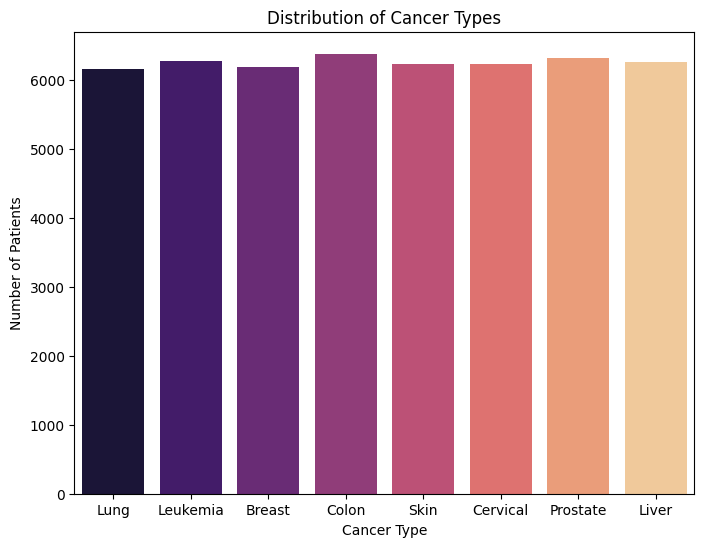

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cancer_Type', data=df,hue ='Cancer_Type', legend = False, palette='magma')
plt.title('Distribution of Cancer Types')
plt.xlabel('Cancer Type')
plt.ylabel('Number of Patients')
plt.show()

This bar chart displays the total number of patients for each cancer type.Upon analyzing the above bar chart we can infer that

1.Colon cancer has the highest number of patients among all types shown.

2.Prostate, Leukemia, and Cervical cancers have patient counts very close to Colon.These are followed by Skin and Liver, suggesting slightly lower—but still high—incidence.

3.Lung and Breast cancers are on the lower end of the spectrum in this chart, though the difference is minimal.

**Boxplot representing age distribution across cancer stages**

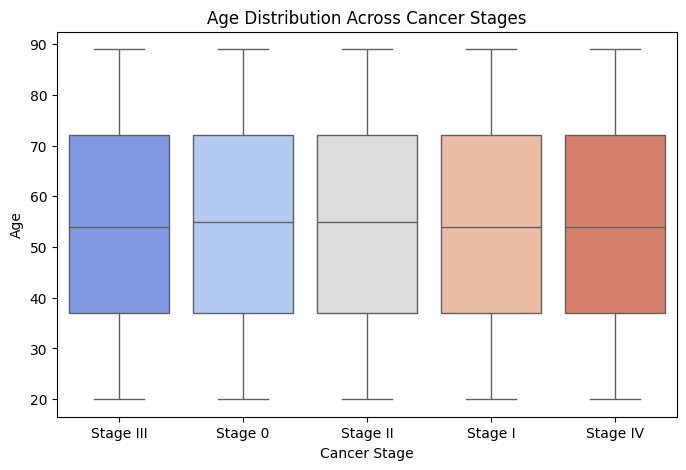

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cancer_Stage', y='Age', data = df, hue = 'Cancer_Stage', legend = False, palette="coolwarm")
plt.title('Age Distribution Across Cancer Stages')
plt.xlabel('Cancer Stage')
plt.ylabel('Age')
plt.show()

This box plot visualizes how patient age varies across different cancer stages, from Stage 0 to Stage IV.Upon analyzing it can be inferred that

1.All cancer stages show a very similar age range, approximately 20 to 89 years, indicating a wide and consistent age distribution regardless of stage.

2.The median age (center line in each box) is around 55 years across all stages, suggesting no significant age difference in earlier or later stages.

3.The boxes (IQR) are of similar height, showing that the middle 50% of stages are nearly identical across stages.

4.This indicates that cancer stage is not strongly correlated with age in this dataset.




**violin plot representing survival years across cancer stages**

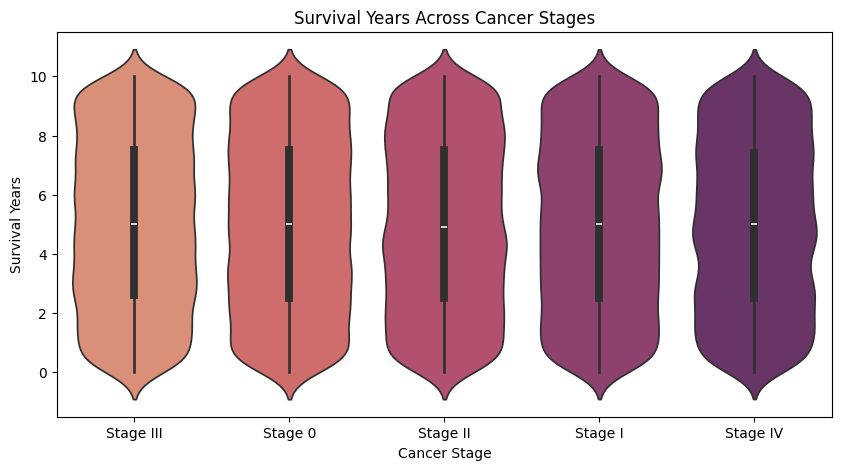

In [ ]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Cancer_Stage', y='Survival_Years', data=df,hue = 'Cancer_Stage', legend = False, palette='flare')
plt.title('Survival Years Across Cancer Stages')
plt.xlabel('Cancer Stage')
plt.ylabel('Survival Years')
plt.show()


The above violin plot illustrates the distribution of survival years for patients at various cancer stages (Stage 0 to Stage IV).upon analyzing it i learnt that

1.Survival spans from 0 to 10 years across all stages.

2.The white dot (median) is consistently around 5 years for all stages.

3.There is no sharp decline in median survival even in higher stages like III and IV.

4.The violin shapes are symmetrical and similarly dense, indicating a balanced spread of survival years across stages.Each stage has peaks around the low and high ends, suggesting some patients survive very short or very long durations.

5.Contrary to expectations, higher stages (III, IV) don’t show a drastic drop in survival years compared to lower stages (0, I).


**Boxplot showing treatment cost by cancer stage and type**

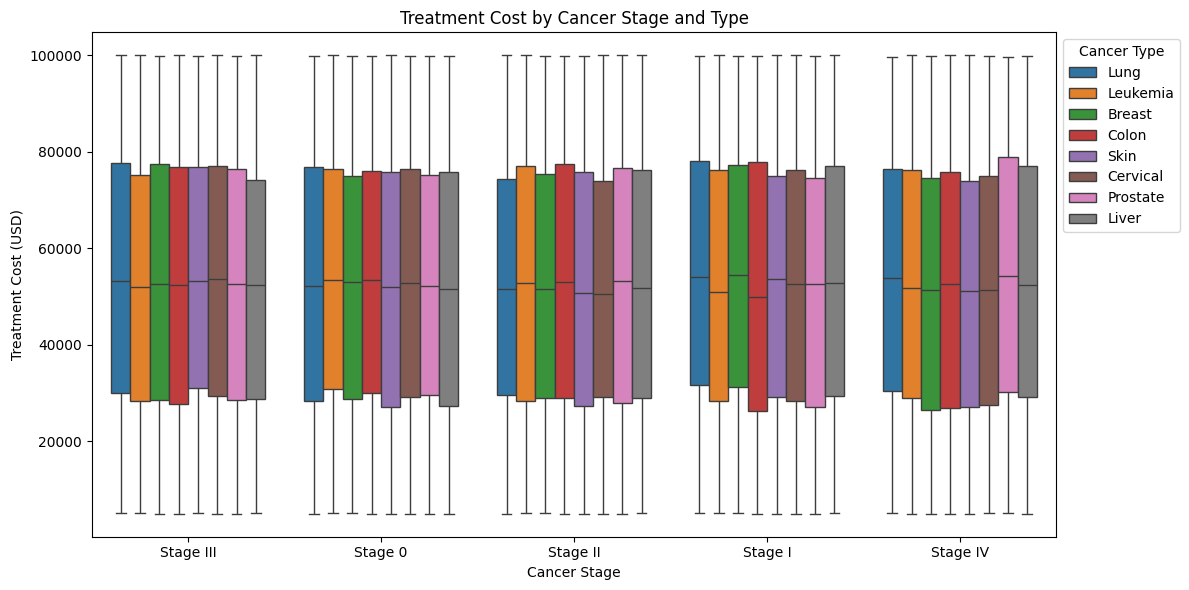

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cancer_Stage',y='Treatment_Cost_USD',hue='Cancer_Type',data=df)
plt.title('Treatment Cost by Cancer Stage and Type')
plt.xlabel('Cancer Stage')
plt.ylabel('Treatment Cost (USD)')
plt.legend(title='Cancer Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

This composite box plot visualizes treatment costs across various cancer stages (Stage 0–IV) and cancer types (e.g., Lung, Leukemia, Breast, etc.).upon analyzing above data i realized that

1.Costs range from about $5,000 to $100,000 USD across all combinations.Most interquartile ranges (IQRs) fall between $30,000 and $75,000, suggesting this is the typical treatment cost band.

2.Median treatment costs are remarkably consistent across cancer stages for each type.Suggests that treatment stage does not drastically alter the cost.Minor variation in median and spread by cancer type.

3.Prostate and Leukemia show slightly higher upper bounds, hinting at possible costlier treatment plans or prolonged interventions.Skin and Cervical cancers appear to have a tighter cost range, potentially indicating more predictable treatment expenses.

4.Whiskers stretch to maximum bounds, indicating significant outliers or extreme treatment costs.Could represent exceptional cases such as intensive care, surgeries, or rare medication.





#Predictive Modeling:Regression and Classifier Algorithms

**Feature Engineering and Test-Train Split**

In [ ]:
X = df.drop('Target_Severity_Score', axis=1)
y = df['Target_Severity_Score']

X = pd.get_dummies(X, drop_first = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Separated features (`X`) and target (`y`)
- Applied one-hot encoding to categorical features
- Split data into training (80%) and test sets (20%) with `random_state=42`

**Linear Regression Model Training**

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

1.Initialized LinearRegression() model with default parameters

2.Trained model using .fit() on training data (X_train, y_train)

3.Generated predictions (y_pred) on test set (X_test)

**Linear Regression Evaluation**

Linear Regression:
R² Score: 0.5053102787624713


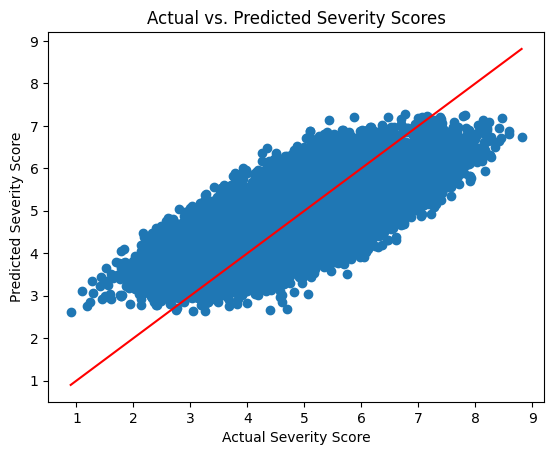

In [ ]:
print("Linear Regression:")
print("R² Score:", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Severity Score")
plt.ylabel("Predicted Severity Score")
plt.title("Actual vs. Predicted Severity Scores")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

1.Measured the r2 value of the linear regression.(0.5053102787624713)

2.plotted a scatterplot showing prdecited severity_score vs actual severity_score.

**Random Forest Regression Implementation**

In [ ]:
rf = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


1.Initialized RandomForestRegressor() model with custom parameters

2.Trained model using .fit() on training data (X_train, y_train)

3.Generated predictions (y_pred) on test set (X_test)

**Random Forest Regression Evaluation**

Random Forest Regressor:
R² Score: 0.49708634227805326


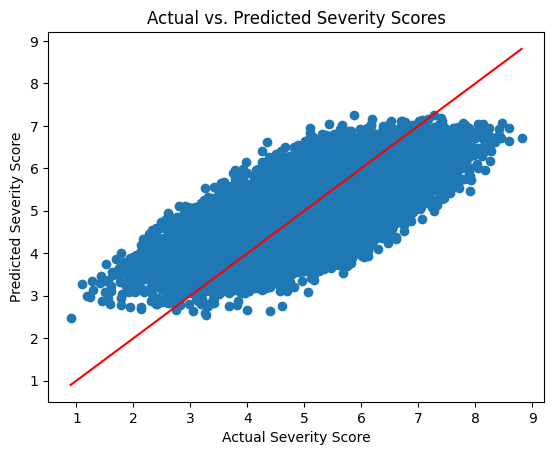

In [ ]:
print("Random Forest Regressor:")
print("R² Score:", r2_score(y_test, y_pred_rf))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Severity Score")
plt.ylabel("Predicted Severity Score")
plt.title("Actual vs. Predicted Severity Scores")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

1.Measured the r2 value of the linear regression.(0.49708634227805326)

2.plotted a scatterplot showing prdecited severity_score vs actual severity_score.

**Severity Classification Function**

In [ ]:
def classify_severity(score):
    if score < 4:
        return 0
    elif score < 6:
        return 1
    else:
        return 2

df['Severity_Class'] = df['Target_Severity_Score'].apply(classify_severity)


classification of severity:

Low (<4):Below-average severity

Medium (4-6):Moderate clinical concern

High (≥6):Critical priority

Converts regression outputs (continuous scores) into numerical values.
Enables classification metrics (precision/recall) for severity assessment.



**Preparing Data for Severity Classification Modeling**

In [ ]:
X1 = df.drop(['Target_Severity_Score', 'Severity_Class'], axis=1)
y1 = df['Severity_Class']

X1 = pd.get_dummies(X1, drop_first=True)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

1.Excludes Target_Severity_Score (raw continuous value) to prevent data leakage
Uses derived Severity_Class (0/1/2) as the classification target.

2.Converts categorical variables into binary columns (e.g., Gender_Male)drop_first=True removes redundant columns to improve model stability

3.80/20 Ratio: Standard for model validation random_state=42: Ensures consistent splits across runs.

**Random Forest Classification Model Training**



In [ ]:
rf_cls = RandomForestClassifier(random_state=42)
rf_cls.fit(X1_train, y1_train)
y1_pred = rf_cls.predict(X1_test)

1.Trained the RandomForestClassifier with default parameters with (X1_train,y1_train)

2.Predicts the severity(y1_pred) on the basis of (X1_test)

**Random Forest Classification Performance Evaluation**

Accuracy: 0.6535
              precision    recall  f1-score     support
0              0.625609  0.407895  0.493820   2204.0000
1              0.660097  0.841826  0.739967   5848.0000
2              0.645249  0.366016  0.467082   1948.0000
accuracy       0.653500  0.653500  0.653500      0.6535
macro avg      0.643651  0.538579  0.566956  10000.0000
weighted avg   0.649603  0.653500  0.632558  10000.0000


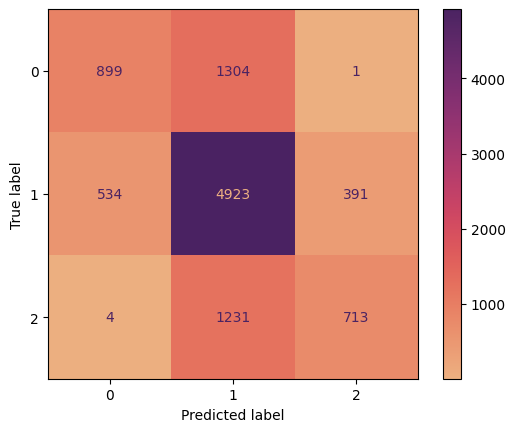

In [ ]:
acc = (accuracy_score(y1_test, y1_pred))
print("Accuracy:", acc)
rf_report = classification_report(y1_test, y1_pred, output_dict=True)
rf_report_df = pd.DataFrame(rf_report).transpose()
print(rf_report_df)
cm = confusion_matrix(y1_test, y1_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cls.classes_)
disp.plot(cmap='flare')
plt.show()

1.Calculated Accuracy Score, Purpose: Measures overall prediction correctness.

Formula: (Correct Predictions) / (Total Samples)

2.Generated Classification Report

Precision: % of correct predictions per class.

High precision = Few false positives.

Recall: % of actual cases captured per class.

High recall = Few false negatives.

F1-Score: Balance of precision/recall

**Naive Bayes Model Training**

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X1_train, y1_train)
y1_pred_nb = nb_model.predict(X1_test)


1.The trained naive bye model Assumes features follow a normal distribution.Uses Bayes' theorem with "naive" feature independence assumption.Fast training/prediction (computes conditional probabilities).Returns class with highest probability.

2. trained it with using .fit() and with data(X1_train , y1_train).

3. predicted severity (y1_pred_nb) on the basis of (X1_test).

**Naive Bayes Model Evaluation**

Accuracy: 0.6638
              precision    recall  f1-score     support
0              0.698182  0.348457  0.464891   2204.0000
1              0.655453  0.896204  0.757151   5848.0000
2              0.695796  0.322895  0.441094   1948.0000
accuracy       0.663800  0.663800  0.663800      0.6638
macro avg      0.683144  0.522519  0.554379  10000.0000
weighted avg   0.672729  0.663800  0.631169  10000.0000


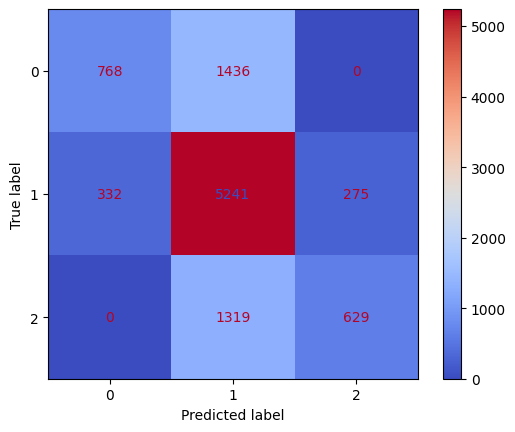

In [ ]:
acc_nb = (accuracy_score(y1_test, y1_pred_nb))
print("Accuracy:", acc_nb)
classification_report_nb = classification_report(y1_test, y1_pred_nb, output_dict=True)
classification_report_df_nb = pd.DataFrame(classification_report_nb).transpose()
print(classification_report_df_nb)
cm_nb = confusion_matrix(y1_test, y1_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_model.classes_)
disp_nb.plot(cmap='coolwarm')

**accuracy score:**

Measures overall prediction correctness

Formula: (Correct Predictions) / (Total Samples)

 **Classification Report:**

Precision: Avoids false positives (e.g., mislabeling "Medium" as "High")

Recall: Captures true positives (e.g., correctly identifying "High" severity)

F1-Score: Balances precision & recall (ideal for imbalanced data)

 **Confusion Matrix**

Rows: Actual classes

Columns: Predicted classes

Red cells: Frequent errors (e.g., "Medium" predicted as "Low")



# Conclusion

This project provided a comprehensive analysis of a synthetic cancer dataset, examining patterns across gender, cancer type, age, stage, survival, and treatment cost. The visualizations and machine learning models together offered valuable insights with both statistical and predictive implications.

***Key Analytical Insights:***

**Age & Gender Distributions:**

Age was evenly spread across genders, with no major skew for any gender group.
All genders showed a similar age range, suggesting cancer diagnoses occur broadly across age demographics.

**Cancer Type Analysis:**

Some cancers like Cervical were gender-specific (e.g., predominantly female).
Colon, Skin, and Prostate cancers were among the most commonly occurring types.

**Stage-wise Trends:**

Age distribution did not significantly vary by cancer stage, indicating that stage progression is not strongly age-dependent.Survival years followed a consistent, declining pattern as cancer stage increased — later stages were associated with fewer survival years.

**Treatment Cost:**

Treatment costs were more influenced by cancer type than by cancer stage.
Costs generally ranged from $30,000–$75,000, but with outliers extending to $100,000

 Machine Learning Overview
I trained and evaluated several machine learning models to predict two main outcomes:

1. **Regression Task :**

Models Used: Linear Regression, Random Forest Regressor

Target: Target_Severity_Score (continuous)

Performance:

Both models achieved a comparable R² score of 0.5(Approximate).

This suggests moderate ability to explain the variance in severity scores, though there's room for improvement.

Random Forest Regressor did not significantly outperform Linear Regression, implying relatively linear relationships in the data.

2. **Classification Task:**

Models Used: Random Forest Classifier, Naive Bayes Classifier

Target: Severity_Class (categorical: 0, 1, 2)

Performance:

Accuracy for both models was close: Random Forest ≈ 0.65, Naive Bayes ≈ 0.66

This reflects modest classification accuracy; performance may be limited by overlapping class features or label imbalance.



# Future Work

**Feature Expansion**: Incorporate clinical features like genetic markers, lifestyle factors, and treatment history to improve model accuracy.

**Model Optimization:** Apply hyperparameter tuning and ensemble methods (e.g., XGBoost, LightGBM) to enhance performance.

**Data Augmentation:** Use synthetic data generation or acquire real-world datasets to improove model training.

# References

Kaggle - https://www.kaggle.com/code/sonawanelalitsunil/global-cancer-patients-2015-24-ml-97-3/notebook